In [1]:
import scienceplots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.style.use("science")
plt.rcParams["font.family"] = "sans-serif"

In [5]:
### Change these paths to the outputs generated from the Experiment 1
df_arc2easy_1_8 = pd.read_csv("results/results_ai2arc_easy_models_1_8.csv")
df_arc2easy_1_3 = pd.read_csv("results/results_ai2arc_easy_models_1_3.csv")
df_arc2easy_3_8 = pd.read_csv("results/results_ai2arc_easy_models_3_8.csv")

df_arc2challenge_1_8 = pd.read_csv("results/results_ai2arc_challenge_models_1_8.csv")
df_arc2challenge_1_3 = pd.read_csv("results/results_ai2arc_challenge_models_1_3.csv")
df_arc2challenge_3_8 = pd.read_csv("results/results_ai2arc_challenge_models_3_8.csv")

df_medqa_1_8 = pd.read_csv("results/results_medqa_models_1_8.csv")
df_medqa_1_3 = pd.read_csv("results/results_medqa_models_1_3.csv")
df_medqa_3_8 = pd.read_csv("results/results_medqa_models_3_8.csv")

df_medmcqa_1_8 = pd.read_csv("results/results_medmcqa_models_1_8.csv")
df_medmcqa_1_3 = pd.read_csv("results/results_medmcqa_models_1_3.csv")
df_medmcqa_3_8 = pd.read_csv("results/results_medmcqa_models_3_8.csv")

percentiles = [10, 25, 50, 75, 100]

# Get the default system colors
fontsize=12
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
b1_color = colors[0]  # First system color
b3_color = colors[1]  # Second system color
b8_color = colors[2]  # Third system color

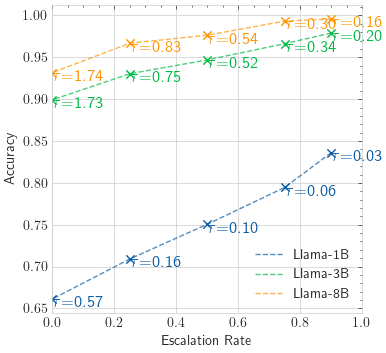

In [6]:
df = pd.DataFrame()
df["label"] = df_arc2easy_1_3["label"]
df["b1_uncertainty"] = df_arc2easy_1_3["base_uncertainty"]
df["b1_prediction"] = df_arc2easy_1_3["base_prediction"]
df["b3_uncertainty"] = df_arc2easy_1_3["large_uncertainty"]
df["b3_prediction"] = df_arc2easy_1_3["large_prediction"]
df["b8_uncertainty"] = df_arc2easy_1_8["large_uncertainty"]
df["b8_prediction"] = df_arc2easy_1_8["large_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b8_taus = np.percentile(df["b8_uncertainty"], percentiles)

plt.figure(figsize=(4, 4))



# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b8_points = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b8 in zip(b1_taus, b3_taus, b8_taus):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.01, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.01, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)

    # 8B
    b8_mask = df["b8_uncertainty"] < tau_b8
    b8_escalation = 1 - b8_mask.mean()
    b8_accuracy = (df[b8_mask]["b8_prediction"] == df[b8_mask]["label"]).mean()
    b8_points.append((b8_escalation, b8_accuracy))
    plt.scatter(b8_escalation, b8_accuracy, marker="x", color=b8_color)
    plt.text(b8_escalation, b8_accuracy - 0.01, fr"$\tau$={tau_b8:.2f}", fontsize=fontsize, color=b8_color)

# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b8_points = np.array(b8_points)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B", alpha=0.7)
plt.plot(b8_points[:, 0], b8_points[:, 1], linestyle="--", color=b8_color, label="Llama-8B", alpha=0.7)

# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/arc2easy_uncertainties.png", bbox_inches="tight")
plt.show()

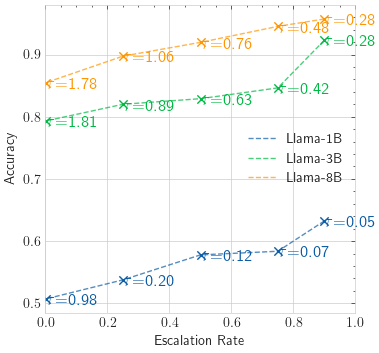

In [7]:
df = pd.DataFrame()
df["label"] = df_arc2challenge_1_3["label"]
df["b1_uncertainty"] = df_arc2challenge_1_3["base_uncertainty"]
df["b1_prediction"] = df_arc2challenge_1_3["base_prediction"]
df["b3_uncertainty"] = df_arc2challenge_1_3["large_uncertainty"]
df["b3_prediction"] = df_arc2challenge_1_3["large_prediction"]
df["b8_uncertainty"] = df_arc2challenge_1_8["large_uncertainty"]
df["b8_prediction"] = df_arc2challenge_1_8["large_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b8_taus = np.percentile(df["b8_uncertainty"], percentiles)

plt.figure(figsize=(4, 4))


# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b8_points = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b8 in zip(b1_taus, b3_taus, b8_taus):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.01, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.01, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)

    # 8B
    b8_mask = df["b8_uncertainty"] < tau_b8
    b8_escalation = 1 - b8_mask.mean()
    b8_accuracy = (df[b8_mask]["b8_prediction"] == df[b8_mask]["label"]).mean()
    b8_points.append((b8_escalation, b8_accuracy))
    plt.scatter(b8_escalation, b8_accuracy, marker="x", color=b8_color)
    plt.text(b8_escalation, b8_accuracy - 0.01, fr"$\tau$={tau_b8:.2f}", fontsize=fontsize, color=b8_color)

# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b8_points = np.array(b8_points)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B", alpha=0.7)
plt.plot(b8_points[:, 0], b8_points[:, 1], linestyle="--", color=b8_color, label="Llama-8B", alpha=0.7)

# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/arc2challenge_uncertainties.png", bbox_inches="tight")
plt.show()

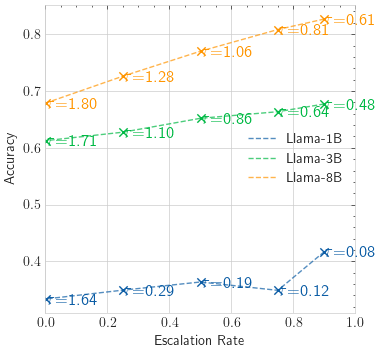

In [8]:
df = pd.DataFrame()
df["label"] = df_medqa_1_3["label"]
df["b1_uncertainty"] = df_medqa_1_3["base_uncertainty"]
df["b1_prediction"] = df_medqa_1_3["base_prediction"]
df["b3_uncertainty"] = df_medqa_1_3["large_uncertainty"]
df["b3_prediction"] = df_medqa_1_3["large_prediction"]
df["b8_uncertainty"] = df_medqa_1_8["large_uncertainty"]
df["b8_prediction"] = df_medqa_1_8["large_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b8_taus = np.percentile(df["b8_uncertainty"], percentiles)

plt.figure(figsize=(4, 4))


# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b8_points = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b8 in zip(b1_taus, b3_taus, b8_taus):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.01, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.01, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)

    # 8B
    b8_mask = df["b8_uncertainty"] < tau_b8
    b8_escalation = 1 - b8_mask.mean()
    b8_accuracy = (df[b8_mask]["b8_prediction"] == df[b8_mask]["label"]).mean()
    b8_points.append((b8_escalation, b8_accuracy))
    plt.scatter(b8_escalation, b8_accuracy, marker="x", color=b8_color)
    plt.text(b8_escalation, b8_accuracy - 0.01, fr"$\tau$={tau_b8:.2f}", fontsize=fontsize, color=b8_color)

# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b8_points = np.array(b8_points)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B", alpha=0.7)
plt.plot(b8_points[:, 0], b8_points[:, 1], linestyle="--", color=b8_color, label="Llama-8B", alpha=0.7)

# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/medqa_uncertainties.png", bbox_inches="tight")
plt.show()

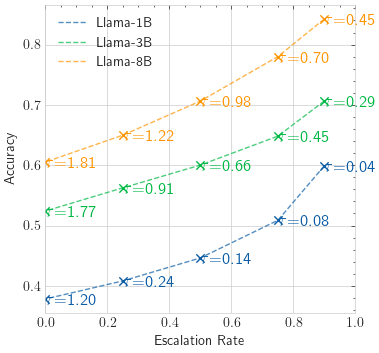

In [9]:
df = pd.DataFrame()
df["label"] = df_medmcqa_1_3["label"]
df["b1_uncertainty"] = df_medmcqa_1_3["base_uncertainty"]
df["b1_prediction"] = df_medmcqa_1_3["base_prediction"]
df["b3_uncertainty"] = df_medmcqa_1_3["large_uncertainty"]
df["b3_prediction"] = df_medmcqa_1_3["large_prediction"]
df["b8_uncertainty"] = df_medmcqa_1_8["large_uncertainty"]
df["b8_prediction"] = df_medmcqa_1_8["large_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b8_taus = np.percentile(df["b8_uncertainty"], percentiles)

plt.figure(figsize=(4, 4))


# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b8_points = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b8 in zip(b1_taus, b3_taus, b8_taus):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.01, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.01, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)

    # 8B
    b8_mask = df["b8_uncertainty"] < tau_b8
    b8_escalation = 1 - b8_mask.mean()
    b8_accuracy = (df[b8_mask]["b8_prediction"] == df[b8_mask]["label"]).mean()
    b8_points.append((b8_escalation, b8_accuracy))
    plt.scatter(b8_escalation, b8_accuracy, marker="x", color=b8_color)
    plt.text(b8_escalation, b8_accuracy - 0.01, fr"$\tau$={tau_b8:.2f}", fontsize=fontsize, color=b8_color)

# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b8_points = np.array(b8_points)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B", alpha=0.7)
plt.plot(b8_points[:, 0], b8_points[:, 1], linestyle="--", color=b8_color, label="Llama-8B", alpha=0.7)

# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/medmcqa_uncertainties.png", bbox_inches="tight")
plt.show()

## Check Surrogate vs Surrogate MC

In [10]:
fontsize=10

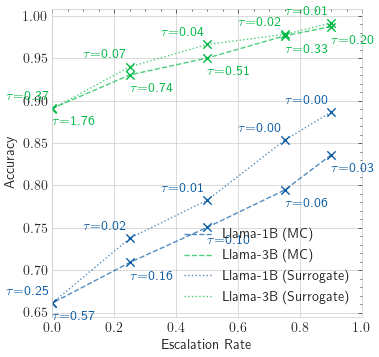

In [11]:
df = pd.DataFrame()
df["label"] = df_arc2easy_1_3["label"]

df["b1_uncertainty"] = df_arc2easy_1_3["base_uncertainty"]
df["b1_simple"] = -df_arc2easy_1_3["base_prob"] * np.log(df_arc2easy_1_3["base_prob"] + 1e-9)
df["b1_prediction"] = df_arc2easy_1_3["base_prediction"]

df["b3_uncertainty"] = df_arc2easy_3_8["base_uncertainty"]
df["b3_simple"] = -df_arc2easy_3_8["base_prob"] * np.log(df_arc2easy_3_8["base_prob"] + 1e-9)
df["b3_prediction"] = df_arc2easy_3_8["base_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b1_taus_simple = np.percentile(df["b1_simple"], percentiles)
b3_taus_simple = np.percentile(df["b3_simple"], percentiles)

plt.figure(figsize=(4, 4))


# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b1_points_simple = []
b3_points_simple = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b1_simple, tau_b3_simple in zip(b1_taus, b3_taus, b1_taus_simple, b3_taus_simple):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.02, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.02, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)
    
    # Only Surrogate Token Probability
    # 1B
    b1_mask = df["b1_simple"] < tau_b1_simple
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points_simple.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation - 0.15, b1_accuracy + 0.01, fr"$\tau$={tau_b1_simple:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_simple"] < tau_b3_simple
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points_simple.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation - 0.15, b3_accuracy + 0.01, fr"$\tau$={tau_b3_simple:.2f}", fontsize=fontsize, color=b3_color)



# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b1_points_simple = np.array(b1_points_simple)
b3_points_simple = np.array(b3_points_simple)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B (MC)", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B (MC)", alpha=0.7)
plt.plot(b1_points_simple[:, 0], b1_points_simple[:, 1], linestyle=":", color=b1_color, label="Llama-1B (Surrogate)", alpha=0.7)
plt.plot(b3_points_simple[:, 0], b3_points_simple[:, 1], linestyle=":", color=b3_color, label="Llama-3B (Surrogate)", alpha=0.7)


# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/arc2easy_comparison.pdf", bbox_inches="tight")
plt.show()

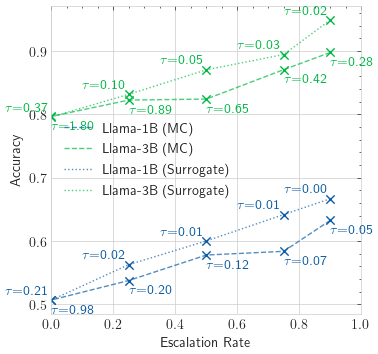

In [12]:
df = pd.DataFrame()
df["label"] = df_arc2challenge_1_3["label"]

df["b1_uncertainty"] = df_arc2challenge_1_3["base_uncertainty"]
df["b1_simple"] = -df_arc2challenge_1_3["base_prob"] * np.log(df_arc2challenge_1_3["base_prob"] + 1e-9)
df["b1_prediction"] = df_arc2challenge_1_3["base_prediction"]

df["b3_uncertainty"] = df_arc2challenge_3_8["base_uncertainty"]
df["b3_simple"] = -df_arc2challenge_3_8["base_prob"] * np.log(df_arc2challenge_3_8["base_prob"] + 1e-9)
df["b3_prediction"] = df_arc2challenge_3_8["base_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b1_taus_simple = np.percentile(df["b1_simple"], percentiles)
b3_taus_simple = np.percentile(df["b3_simple"], percentiles)

plt.figure(figsize=(4, 4))


# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b1_points_simple = []
b3_points_simple = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b1_simple, tau_b3_simple in zip(b1_taus, b3_taus, b1_taus_simple, b3_taus_simple):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.02, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.02, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)
    
    # Only Surrogate Token Probability
    # 1B
    b1_mask = df["b1_simple"] < tau_b1_simple
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points_simple.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation-0.15, b1_accuracy + 0.01, fr"$\tau$={tau_b1_simple:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_simple"] < tau_b3_simple
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points_simple.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation-0.15, b3_accuracy + 0.01, fr"$\tau$={tau_b3_simple:.2f}", fontsize=fontsize, color=b3_color)



# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b1_points_simple = np.array(b1_points_simple)
b3_points_simple = np.array(b3_points_simple)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B (MC)", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B (MC)", alpha=0.7)
plt.plot(b1_points_simple[:, 0], b1_points_simple[:, 1], linestyle=":", color=b1_color, label="Llama-1B (Surrogate)", alpha=0.7)
plt.plot(b3_points_simple[:, 0], b3_points_simple[:, 1], linestyle=":", color=b3_color, label="Llama-3B (Surrogate)", alpha=0.7)


# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/arc2challenge_comparison.pdf", bbox_inches="tight")
plt.show()

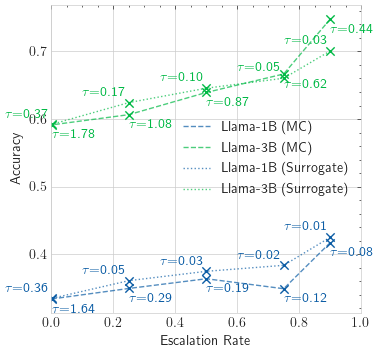

In [13]:
df = pd.DataFrame()
df["label"] = df_medqa_1_3["label"]

df["b1_uncertainty"] = df_medqa_1_3["base_uncertainty"]
df["b1_simple"] = -df_medqa_1_3["base_prob"] * np.log(df_medqa_1_3["base_prob"] + 1e-9)
df["b1_prediction"] = df_medqa_1_3["base_prediction"]

df["b3_uncertainty"] = df_medqa_3_8["base_uncertainty"]
df["b3_simple"] = -df_medqa_3_8["base_prob"] * np.log(df_medqa_3_8["base_prob"] + 1e-9)
df["b3_prediction"] = df_medqa_3_8["base_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b1_taus_simple = np.percentile(df["b1_simple"], percentiles)
b3_taus_simple = np.percentile(df["b3_simple"], percentiles)

plt.figure(figsize=(4, 4))


# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b1_points_simple = []
b3_points_simple = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b1_simple, tau_b3_simple in zip(b1_taus, b3_taus, b1_taus_simple, b3_taus_simple):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.02, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.02, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)
    
    # Only Surrogate Token Probability
    # 1B
    b1_mask = df["b1_simple"] < tau_b1_simple
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points_simple.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation-0.15, b1_accuracy + 0.01, fr"$\tau$={tau_b1_simple:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_simple"] < tau_b3_simple
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points_simple.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation-0.15, b3_accuracy + 0.01, fr"$\tau$={tau_b3_simple:.2f}", fontsize=fontsize, color=b3_color)



# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b1_points_simple = np.array(b1_points_simple)
b3_points_simple = np.array(b3_points_simple)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B (MC)", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B (MC)", alpha=0.7)
plt.plot(b1_points_simple[:, 0], b1_points_simple[:, 1], linestyle=":", color=b1_color, label="Llama-1B (Surrogate)", alpha=0.7)
plt.plot(b3_points_simple[:, 0], b3_points_simple[:, 1], linestyle=":", color=b3_color, label="Llama-3B (Surrogate)", alpha=0.7)


# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/medqa_comparison.pdf", bbox_inches="tight")
plt.show()

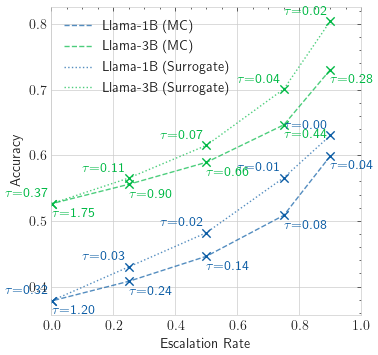

In [14]:
df = pd.DataFrame()
df["label"] = df_medmcqa_1_3["label"]

df["b1_uncertainty"] = df_medmcqa_1_3["base_uncertainty"]
df["b1_simple"] = -df_medmcqa_1_3["base_prob"] * np.log(df_medmcqa_1_3["base_prob"] + 1e-9)
df["b1_prediction"] = df_medmcqa_1_3["base_prediction"]

df["b3_uncertainty"] = df_medmcqa_3_8["base_uncertainty"]
df["b3_simple"] = -df_medmcqa_3_8["base_prob"] * np.log(df_medmcqa_3_8["base_prob"] + 1e-9)
df["b3_prediction"] = df_medmcqa_3_8["base_prediction"]

# Calculate percentiles for each model
b1_taus = np.percentile(df["b1_uncertainty"], percentiles)
b3_taus = np.percentile(df["b3_uncertainty"], percentiles)
b1_taus_simple = np.percentile(df["b1_simple"], percentiles)
b3_taus_simple = np.percentile(df["b3_simple"], percentiles)

plt.figure(figsize=(4, 4))


# Initialize lists to store points for connecting lines
b1_points = []
b3_points = []
b1_points_simple = []
b3_points_simple = []

# Loop over the percentiles for each model
for tau_b1, tau_b3, tau_b1_simple, tau_b3_simple in zip(b1_taus, b3_taus, b1_taus_simple, b3_taus_simple):
    # 1B
    b1_mask = df["b1_uncertainty"] < tau_b1
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation, b1_accuracy - 0.02, fr"$\tau$={tau_b1:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_uncertainty"] < tau_b3
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation, b3_accuracy - 0.02, fr"$\tau$={tau_b3:.2f}", fontsize=fontsize, color=b3_color)
    
    # Only Surrogate Token Probability
    # 1B
    b1_mask = df["b1_simple"] < tau_b1_simple
    b1_escalation = 1 - b1_mask.mean()
    b1_accuracy = (df[b1_mask]["b1_prediction"] == df[b1_mask]["label"]).mean()
    b1_points_simple.append((b1_escalation, b1_accuracy))
    plt.scatter(b1_escalation, b1_accuracy, marker="x", color=b1_color)
    plt.text(b1_escalation-0.15, b1_accuracy + 0.01, fr"$\tau$={tau_b1_simple:.2f}", fontsize=fontsize, color=b1_color)

    # 3B
    b3_mask = df["b3_simple"] < tau_b3_simple
    b3_escalation = 1 - b3_mask.mean()
    b3_accuracy = (df[b3_mask]["b3_prediction"] == df[b3_mask]["label"]).mean()
    b3_points_simple.append((b3_escalation, b3_accuracy))
    plt.scatter(b3_escalation, b3_accuracy, marker="x", color=b3_color)
    plt.text(b3_escalation-0.15, b3_accuracy + 0.01, fr"$\tau$={tau_b3_simple:.2f}", fontsize=fontsize, color=b3_color)



# Connect the points with dashed lines
b1_points = np.array(b1_points)
b3_points = np.array(b3_points)
b1_points_simple = np.array(b1_points_simple)
b3_points_simple = np.array(b3_points_simple)
plt.plot(b1_points[:, 0], b1_points[:, 1], linestyle="--", color=b1_color, label="Llama-1B (MC)", alpha=0.7)
plt.plot(b3_points[:, 0], b3_points[:, 1], linestyle="--", color=b3_color, label="Llama-3B (MC)", alpha=0.7)
plt.plot(b1_points_simple[:, 0], b1_points_simple[:, 1], linestyle=":", color=b1_color, label="Llama-1B (Surrogate)", alpha=0.7)
plt.plot(b3_points_simple[:, 0], b3_points_simple[:, 1], linestyle=":", color=b3_color, label="Llama-3B (Surrogate)", alpha=0.7)


# Final touches
plt.xlabel("Escalation Rate")
plt.ylabel("Accuracy")
plt.xlim(0, 1)
plt.legend()
plt.savefig("../figures/medmcqa_comparison.pdf", bbox_inches="tight")
plt.show()